In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo simulation of teletherapy machine ($^{60}$Co machine).

## I. Introduction.

Cobalt machine is the most used machines for radiotherapy in near past. These machines contain a radioactive source $^{60}Co$, passive radiation shield and two pairs of jaws in $x$ and $y$ direction which is perpendicular [1]. This two pairs of jaws allows us to make a rectangle fields with different sizes as it is shown on the figure bellow.

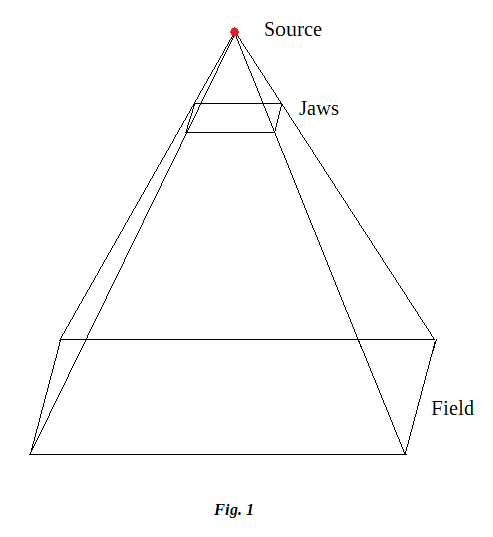

The main problem of cobalt machine is that the source is not a point. In practice usually is used a source with cylindrical form with radius $1cm$ and with $2cm$ hight [1]. Which means that there will be significant penumbra on the edge of the field as it is shown geometricaly in $fig.2$.

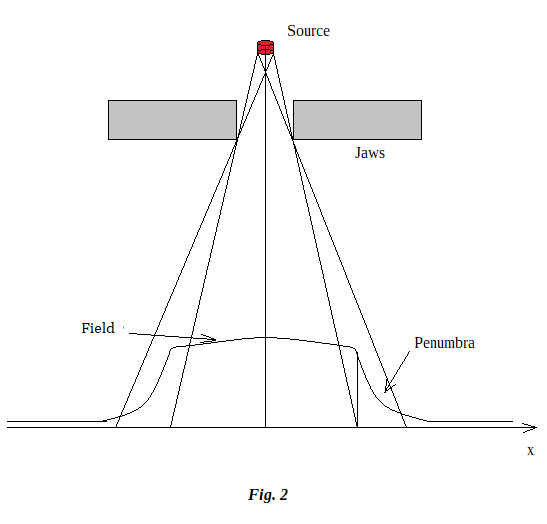

## II. Monte Carlo simulation.

Now let's make a Monte Carlo simulation to demonstrate the creation of the field and occurance of the penumbra.

Before presenting the code I will explain the principle of this simulation. 

Our source emit gamma rays from random part of his body which means random $x$, $y$ and $z$ coordinates and also emitted gamma rays are with random directions which in terms of geometry means random polar ($\theta$) angle in range from $0$ to $\pi$ and azimuthal angle ($\phi$) in range from $0$ to $2\pi$ as it is shown on figure below. Also our jaws which limit the size of the field have a certain thickness ($l = 15cm$) and as we know passing of the gamma rays through a given material is a probabilistic process. So we have to take this into account when we simulate the creation of the field because this mean that it is possible to have gamma rays that passed through the jaws. In practice producers of cobalt machines make jaws from tungsten [1]. 

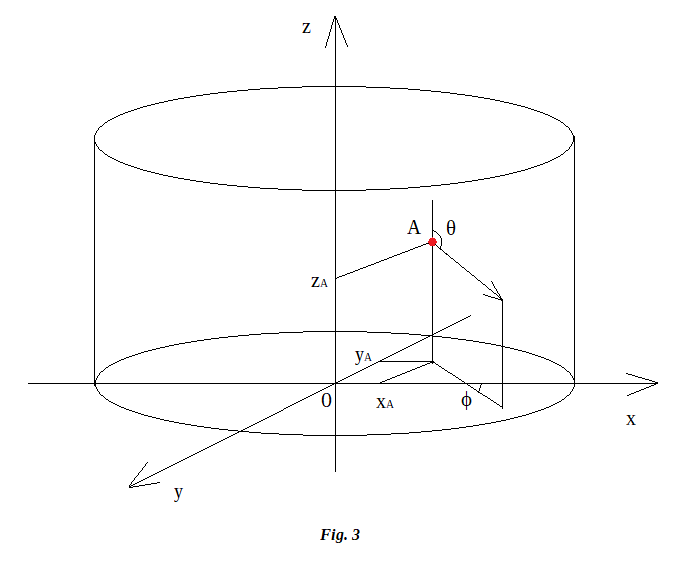

### 1. Evenly distributed points in circle.

We already say that our source is with cylindrical form which means that in $x y$ plane it looks like a circle. To generate random points from which gamma rays are emitted we need to generate $x$ and $y$ coordinate and sum of their square values have to be in range from $0$ to $R^2$ but in this case when we choose random points from inside a circle it will be more easy to use polar coordinates and to generate random distance from the $0$ of coordinate system in range from $0$ to $R$ and an angle $\alpha$ from $0$ to $2\pi$. But if we make it in this way we will see that our points are not evenly distributed. Most of the points will be near to the center of the circle because values for the distance from the center are with equal probability which means that if we double the radius number of points must be also doubled but the area will rise 4 times which will decrease the density because it is equal to the number of points devided by the area. We want the density to be constant: $$d = \frac{n}{\pi r^2} = \frac{N}{\pi R^2}$$ where $d$ is the density, $R$ is the radius of the source, $N$ is total count of points, $r$ is random value for radius between $0$ and $R$ and $n$ is number of points in circle with radius $r$. From the equation above we have: $$r = R \sqrt{\frac{n}{N}}$$ where $\frac{n}{N}$ is between $0$ and $1$. In this way we will get non equal probability for the value of radius which will give us evenly distributed points in the circle.

I demonstrate the effect of this correction with the code below.

In [3]:
def even_distribution(radius_of_the_source, number_of_points):
    for i in range(0, number_of_points):
        #generating random values for radius and alpha angle
        r1 = radius_of_the_source * np.random.rand()
        alpha = 2 * np.pi * np.random.rand()
        
        #convert polar coordinates to orthogonal coordinates
        x1 = r1 * np.cos(alpha)
        y1 = r1 * np.sin(alpha)
        
        plt.scatter(x1, y1)
        
    plt.title("Without corection")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("square")
    plt.show()
    
    for i in range(0, number_of_points):
        #generating random values for radius and alpha angle but with correction for radius
        r2 = radius_of_the_source * np.sqrt(np.random.rand())
        alpha = 2 * np.pi * np.random.rand()
        
        #convert polar coordinates to orthogonal coordinates
        x2 = r2 * np.cos(alpha)
        y2 = r2 * np.sin(alpha)
        
        plt.scatter(x2, y2)
    
    plt.title("With corection")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("square")
    plt.show()

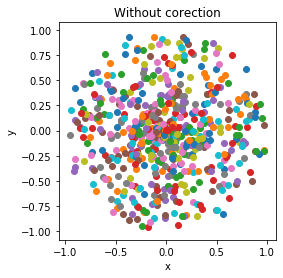

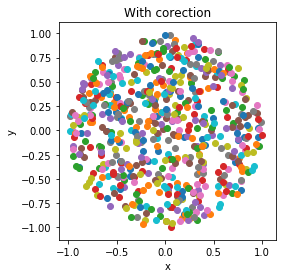

In [4]:
even_distribution(1,25**2)

The difference between two distributions of the points is obvious. 

### 2. Determining coordinates in which gamma ray will reach and the probability for passing through the body of the source and the jaws.

After we already can generate evenly distributed points in circle let's move to the passing of gamma rays through the materials and to create a treatment field. 

Interaction of the gamma rays with matter is probabilistic process and this probability can be calculated with this formula: $$p = e^{-\mu h} $$ $p$ is the probability for passing through the matterial with thickness $h$ and absorption coefficient $\mu$ [2]. 

First we have to calculate the probability for gamma ray emitted from the inside of the source (as it is shown on $fig.3$) to exit. Absorption coefficient of the cobalt is $\mu_{Co} = 0.47 cm^{-1}$ [3]. In this case the thickness of the material will be the distance between the point from which the gamma ray was emitted and the point in which it exit the body of the sourcе. We assume that gamma ray exit the body of the source from his latteral side because in this case the area of his latteral side is $2\pi R p = 4\pi $, where $p$ is the hight of the source and $R$ is his radius, and the area of both bases of the source is $2\pi R^2$ which is two times less then the area of his latteral side and the probability gamma ray to exit the body of the source from his latteral side is twice as large. To calculate this distance we need first to calculate his projection on $xy$ plane. Let this projection is $h'$, so we have: 

$$(x_A + \Delta x)^2 + (y_A + \Delta y)^2 = R^2 \\ {x^2}_A + 2 x_A \Delta x + \Delta x^2 + {y^2}_A + 2 y_A \Delta y + \Delta y^2 - R^2 = 0  \\ \Delta x = h'cos\phi \\ \Delta y = h' sin\phi \\ => {x^2}_A + 2 x_A h' cos\phi + {h'}^2 cos^2 \phi + {y^2}_A + 2 y_A h' sin\phi + {h'}^2 sin^2 \phi - R^2 = 0 \\ {h'}^2 + 2(x_A cos\phi + y_A sin\phi)h' + {y^2}_A + {x^2}_A - R^2 = 0 $$

The roots of this quadratic equation is:

$$ h'_{1,2} = -(x_A cos\phi + y_A sin\phi) \pm \sqrt{(x_A cos\phi + y_A sin\phi)^2 + R^2 - {x^2}_A - {y^2}_A} $$

If we look closure to this result we will see that $R^2 \geq {x^2}_A + {y^2}_A$ because ${x^2}_A + {y^2}_A$ is the square of the distance from the zero of the coordinate system to the point from which gamma ray is emitted and will be in range from $0$ to $R^2$ which means that: 

$$(x_A cos\phi + y_A sin\phi) \leq \sqrt{(x_A cos\phi + y_A sin\phi)^2 + R^2 - {x^2}_A - {y^2}_A}$$ 

and we know that this distance $h'$ can't be negative so then we can say that we have only one real root of the quadratic equation above, which is:

$$ h' = -(x_A cos\phi + y_A sin\phi) + \sqrt{(x_A cos\phi + y_A sin\phi)^2 + R^2 - {x^2}_A - {y^2}_A} $$

And when we know the root of the equation we can calculate $\Delta x$ and $\Delta y$.

$z$ coordinate can be calculated in this way:

$$tg\theta = \frac{h'}{z - z_A} \\ z = \frac{h'}{tg\theta} + z_A$$

If $z$ is in range from $0$ to $2$ this means that gamma ray exit the body of the source from his latteral side and distance $h$ will be:

$$h = \frac{h'}{sin\theta} $$

If $z$ is not in this range this means that the gamma ray exit the body from one of his bases. If $tg\theta$ is positive then gamma ray exit the body from his top base and $z$ coordinate will be equal to $2$ else from his bottom base and $z$ coordinate will be equal to $0$. In this case $h'$ will be equal to $(z - z_A)tg\theta$ and $\Delta x$ and $\Delta y$ will be:

$$\Delta x = (z - z_A) tg\theta cos\phi \\ \Delta y = (z - z_A) tg\theta sin\phi $$

And distance $h$ will be again $\frac{h'}{sin\theta}$:

Below is presented the code for generating random point inside of the body of source from which gamma ray is emitted, determining the coordinates of the point from which it will exit the body and determining whenever the gamma ray will leave the body of the source.

In [5]:
def generating_and_leaving_body(radius_of_the_source, source_hight):
    mu_Co = 0.47 #absorption coefficient of Co-60
    
    #generating random values for radius, z coordinate, alpha, theta and phi angles
    rA = radius_of_the_source * np.sqrt(np.random.rand())
    alpha = 2 * np.pi * np.random.rand()
    zA = 2 * np.random.rand()
    phi = 2 * np.pi * np.random.rand()
    theta = np.pi * np.random.rand()
    
    #generating value between 0 and 1 to determine does the gamma ray will exit the body of the source or not
    n = np.random.rand()
        
    xA = rA * np.cos(alpha)
    yA = rA * np.sin(alpha)
    
    h_prime = -(xA * np.cos(phi) + yA * np.sin(phi)) + np.sqrt((xA * np.cos(phi) + yA * np.sin(phi)) ** 2 + radius_of_the_source ** 2 - xA ** 2 - yA ** 2)
    
    z = h_prime / np.tan(theta) + zA
    
    if 0 <= z <= source_hight:
        zE = z
        
    else:
        if np.tan(theta) > 0:
            zE = source_hight
        else:
            zE = 0
        h_prime = (zE - zA) * np.tan(theta)
        
    h = h_prime / np.sin(theta)
    p = np.exp(- mu_Co * h) #calculating the probability for gamma ray to exit the body of the source
    
    if n <= p:
        xE = xA + h_prime * np.cos(phi)
        yE = yA + h_prime * np.sin(phi)
        return xE, yE, zE, theta, phi

Before starting with calculations for determining if the gamma ray will reach the surface in which we "measure" first have to calculate what have to be position of the jaws to form a field that we want. Usually the reference field which has to be measured is a field with size $10x10cm$. I already say that usually the thickness of the jaws is $15cm$ also distance from bottom surface of the source to the top surface of the jaws is $15cm$ and distance from bottom surface of the source to the surface in which we "measure" is $100cm$ ($fig.4$) [2]. So to form this field we can calculate the position of the jaws in this way:

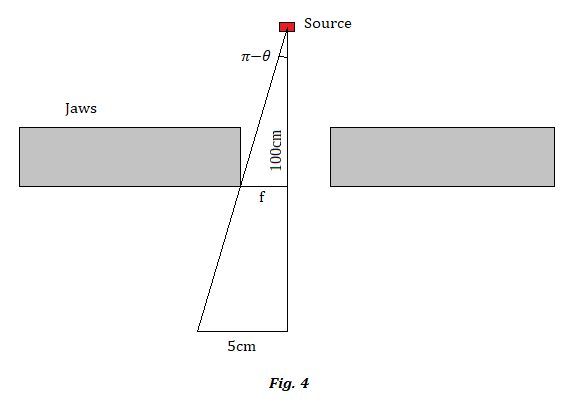

$$tg(\pi - \theta) = \frac{5}{100} = \frac{f}{30} => f = \frac{5.30}{100}= 1.5cm  $$

Now we can say that jaws should be opened by $1.5cm$ from the center.

I put the $0$ of the coordinate system at the center of the bottom base of the source so the $z$ coordinate of the surface in which lie the top base of the jaws will be $-15cm$, for bottom base will be $-30cm$ and for surface in which we measure will be $-100cm$.

There are 4 options for a given gamma ray:

1. To pass between the jaws and to reach the surface in which we "measure" without interacting with jaws.
2. To fall on the top surface of the jaw.
3. To fall on the latteral side of the jaw.
4. To don't reach the plane in which the jaws lie.

First we can say that if the polar angle ($\theta$) is less than or equal to $\pi / 2$ this gamma ray will not reach the plane in which jaws lie and we are not interested at these gamma rays because they don't take a part in forming of our field. To determine which of the other cases we have we need to calculate $x$ and $y$ coordinates in which gamma ray reach the plane of top base of the jaws ($z = -15 cm$). If $x$ or $y$ coordinate is bigger that or equal to $1.5 cm$ this means that gamma ray reach top base of the jaws if both are less then $1.5 cm$ I will calculate $x$ and $y$ coordinate in which gamma ray reach the plane of bottom base of the jaws ($z = -30 cm$) if one of these coordinates are bigger than $1.5 cm$ this means that gamma ray will reach the latteral side of the jaw else gamma ray just pass between the jaws and reach surface in which we "measure".

After we determine which of these cases we have if the gamma ray fall on the top base or on the latteral side of the jaw we have to calculate what is the distance that gamma ray travel inside of the jaw and to calculate the probability for passing. At the begining I say that jaws usually are made from tungsten. For this energy of the gamma rays the absorption coefficient of tungsten is $\mu_W = 0.98 cm^{-1}$ [3].

If the gamma ray fall on the top base of the jaw the distance which gamma ray passes through the jaw will be equal to: $$d = \frac{l}{cos(\pi - \theta)}$$ where $l$ is the thickness of the jaw.

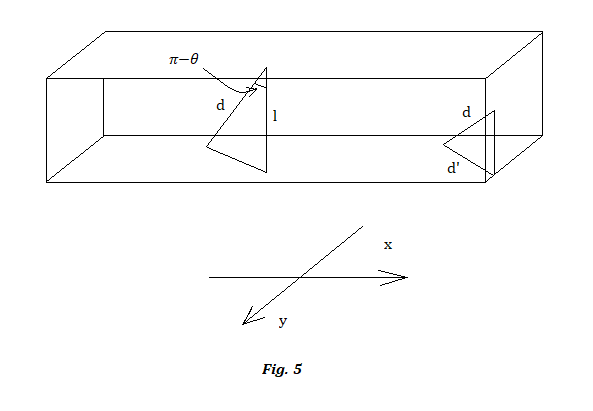

If the gamma ray fall on the latteral side of the jaw this distance will be equal to: $$d = \frac{d'}{sin(\pi - \theta)} $$ where $d'$ is projection of this distance in $xy$ plane and can be calculated in this way if $x_J$ is bigger: $$d' = \frac{|x_J| - 1.5}{cos\phi} => d = \frac{|x_J| - 1.5}{cos\phi sin(\pi - \theta)}$$ and in this way if $y_J$ is bigger: $$d' = \frac{|y_J| - 1.5}{sin\phi} => d = \frac{|y_J| - 1.5}{sin\phi sin(\pi - \theta)} $$ where $x_J$ and $y_J$ are the coordinates in which gamma ray reach the bottom surface of the jaws.

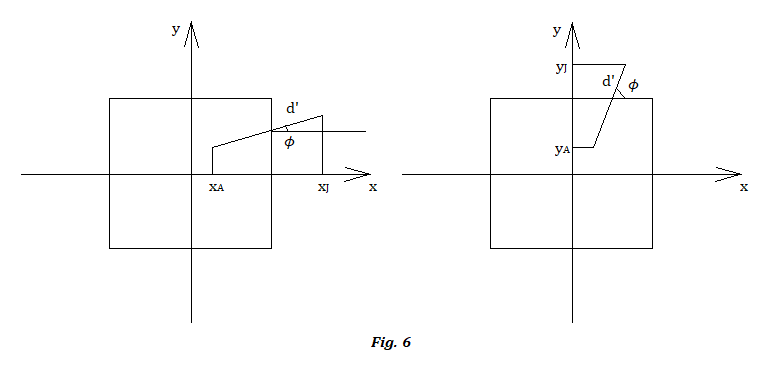

After determining which gamma ray will pass through the jaws we can calculate $x$ and $y$ coordinates in which he will reach the plane in which we "measure" ($z = -100 cm$).

With the code below is shown the result of this calculations and treatment field is plotted in $xz$ and $yz$ plane.

In [6]:
def reaching_jaws(thickness_of_jaws, top_surface_z, bottom_surface_z, measure_z):
    mu_jaws = 0.98 #absorption coefficient of tungsten
    
    n = np.random.rand()
    exit_point = generating_and_leaving_body(1, 2)
    d = 0
    is_reach_measure_plane = False
    
    # determining where gamma ray will fall
    if exit_point != None:
        xE, yE, zE, theta, phi = exit_point
        
        if theta > np.pi / 2:
            x = xE + (top_surface_z - zE) * np.tan(theta) * np.cos(phi)
            y = yE + (top_surface_z - zE) * np.tan(theta) * np.sin(phi)
            
            if abs(x) >= 1.5 or abs(y) >= 1.5:
                d = thickness_of_jaws / np.cos(np.pi - theta)
            else:
                x = xE + (bottom_surface_z - zE) * np.tan(theta) * np.cos(phi)
                y = yE + (bottom_surface_z - zE) * np.tan(theta) * np.sin(phi)
                
                if abs(x) > 1.5 or abs(y) > 1.5:
                    if abs(x) > abs(y):
                        d = (abs(x) - 1.5) / (np.cos(phi) * np.sin(np.pi - theta))
                    else:
                        d = (abs(y) - 1.5) / (np.sin(phi) * np.sin(np.pi - theta))
                else:
                    is_reach_measure_plane = True
                    
            if d < 0:
                d *= -1
                
            p = np.exp(- mu_jaws * d) # probability for passing through the jaws
            
            if n <= p:
                is_reach_measure_plane = True
                
    if is_reach_measure_plane == True:
        return xE, yE, zE, theta, phi, is_reach_measure_plane

In [7]:
def field_simulation(determining_coordinates, number_of_gamma, thickness_of_jaws, top_surface_z, bottom_surface_z, measure_z):

    #creating empty lists for x and y coordinates of the gamma rays which will reach the surface in which we "measure"
    x_field = list()
    y_field = list()

    #generating gamma rays
    for i in range(0, number_of_gamma):
        reaching_measure_plane = determining_coordinates(thickness_of_jaws, top_surface_z, bottom_surface_z, measure_z)
    
        #determining is this gamma ray will reach the surface or not
        if reaching_measure_plane != None:
            xE, yE, zE, theta, phi, is_reach_measure_plane = reaching_measure_plane
            x = xE + (-100 - zE) * np.tan(theta) * np.cos(phi)
            y = yE + (-100 - zE) * np.tan(theta) * np.sin(phi)
            x_field.append(x)
            y_field.append(y)
        
    #plotting the field
    plt.hist(x_field, bins = 50)
    plt.xlabel("x")
    plt.ylabel("Number of gamma rays")
    plt.show()

    plt.hist(y_field, bins = 50)
    plt.xlabel("y")
    plt.ylabel("Number of gamma rays")
    plt.show()

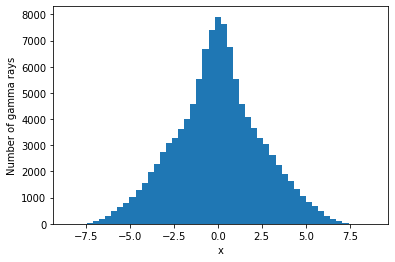

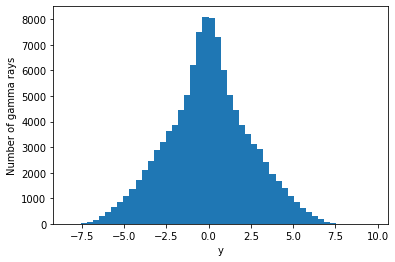

In [9]:
field_simulation(reaching_jaws, 10**7, 15, -15, -30, -100)

### 3. Flattening filter.

This is expected result because from different points from plane in which we "measure" we doesn't see whole part of the source. To make "flat" field we put flattening filter which is a cone between source and jaws [2]. In this work I will not calculate how much this cone have to reduce the field at the center we can see this from the plots above. The attitude of the number of points in the center of field to the end of the field in $xz$ and $yz$ is about 8 times and now we will calculate hight of the cone.

If we look at the cone in $xz$ or $yz$ plane we will see the cone as a triangle as it is shown on the figure below. The radius of the base of the cone have to cover whole field in this case this means $q = \sqrt{x^2_{max} + y^2_{max}}$ where $x_{max} = y_{max} = 5cm$. This triangle is isosceles so we can make our calculation only about half of it and it will be the same for other half.

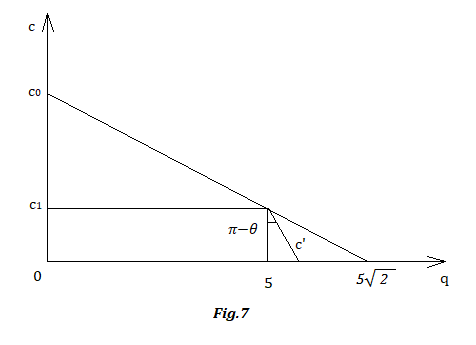

At the figure above $c_0$ is the hight of the cone and $c_1$ is the thickness of the cone in edge of the field for $x$ and $y$ coordinates. The attitude of the probability for passing through the cone in the center and in $5 cm$ away from the center must be $\frac{1}{8}$. 

$$\frac{e^{-c_0}}{e^{-c_1}} = \frac{1}{8} => c_1 - c_0 = ln(\frac{1}{8})$$ $$c = aq + b$$

If $q = 0$ this means that $c = b = c_0 => c = aq + c_0$

$$c_1 = 5a + c_0 \\ => 5a + c_0 - c_0 = ln(\frac{1}{8}) \\ => a = \frac{ln(\frac{1}{8})}{5} \\ => c = \frac{ln(\frac{1}{8})}{5} q + c_0$$

If $c = 0 => q = 5\sqrt{2}$ this leads to:

$$\frac{ln(\frac{1}{8})}{5} 5\sqrt{2} + c_0 = 0 \\ c_0 = - ln(\frac{1}{8}) \sqrt{2} = 2.94$$

And final equation for $c$ is: $$c = \frac{ln(\frac{1}{8})}{5} q + 2.94 = -0.42q + 2.94 $$

If we take into account polar angle then this distance will be equal to: $$c' = \frac{c}{cos(\pi - \theta)} =\frac{ -0.42q + 2.94}{cos(\pi - \theta)}$$

Probability for passing will be equal to : $$p = e^{-c'} = e^{\frac{0.42q - 2.94}{cos(\pi - \theta)}}$$

But here we have to take into account also that the projection of arc of a circle to $q$ axis is different for different polar angles. If polar angle is near to $\pi$ then projection will be smaller then if polar angle is smaller than $\pi$. This is shown on the figure below.

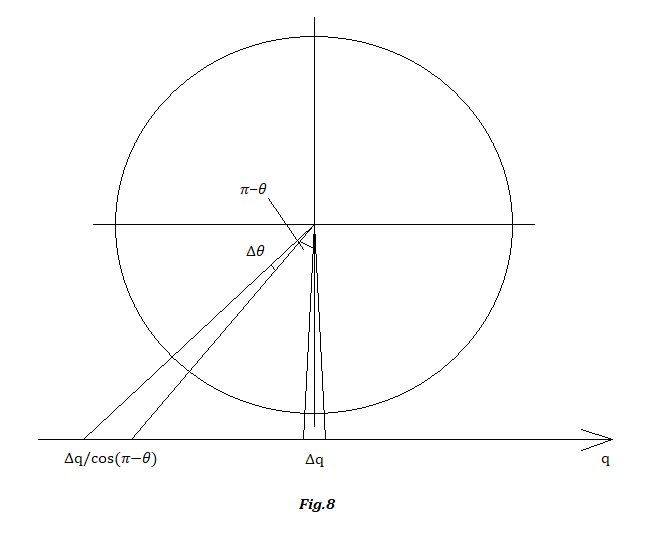

This effect change the probability and can be corrected by division to $cos(\pi - \theta)$.

With the code below is demonstrated forming of field with flattening filter.

In [10]:
def field_simulation_with_flattening_filter(determining_coordinates, number_of_gamma, thickness_of_jaws, top_surface_z, bottom_surface_z, measure_z):

    #creating empty lists for x and y coordinates of the gamma rays which will reach the surface in which we "measure"
    x_field = list()
    y_field = list()

    #generating gamma rays
    for i in range(0, number_of_gamma):
        reaching_measure_plane = determining_coordinates(thickness_of_jaws, top_surface_z, bottom_surface_z, measure_z)
    
        #determining is this gamma ray will reach the surface or not
        if reaching_measure_plane != None:
            xE, yE, zE, theta, phi, is_reach_measure_plane = reaching_measure_plane
            x = xE + (-100 - zE) * np.tan(theta) * np.cos(phi)
            y = yE + (-100 - zE) * np.tan(theta) * np.sin(phi)
            n = np.random.rand()
        
            #correction for flattening filter
            if n <= np.exp( - np.log(1 / 8) * (np.sqrt(x**2 + y**2) / 5 - np.sqrt(2)) / np.cos(np.pi - theta)) / np.cos(np.pi - theta):
                x_field.append(x)
                y_field.append(y)
            
    #plotting the field
    plt.hist(x_field, bins = 50)
    plt.xlabel("x")
    plt.ylabel("Number of gamma rays")
    plt.show()

    plt.hist(y_field, bins = 50)
    plt.xlabel("y")
    plt.ylabel("Number of gamma rays")
    plt.show()

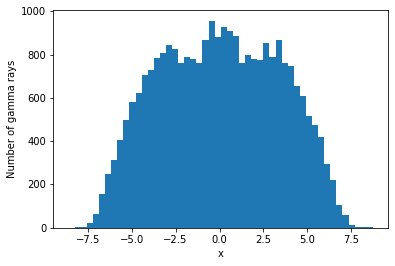

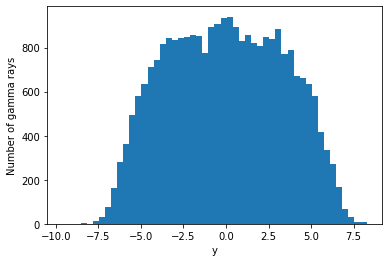

In [12]:
field_simulation_with_flattening_filter(reaching_jaws, 10**7, 15, -15, -30, -100)

This field profile doesn't look exactly "flat" but this is because I simulate only $10^7$ gamma rays. The real activity of the source for teletherapy machine is about $400 TBq$ which is $4.10^{14}$ gamma rays per second [4]. If I make the simulation with more particles these fluctuations will disappear but it will take very very long time for calculations but this is good enought to demonstrate the forming of the field and the effect of flattening filter.

### 4. Multileaf collimator.

At the begining I say that teletherapy machines in near past were most used machines in radiotherapy. In nowadays they are replaced from linear accelerators. The main reason for this is that with these machines we can make only rectanguler fields. To make different shape of field they put multileaf collimator (MLC) to machine. This collimator usually contains $60$ separate leafs which change the form of field ($fig.9$). The reason not to put this MLC to the teletherapy machine is that the width of the every leaf is $3 mm$ and when we take penumbra into account we will se that this is not effective way to modify the shape of the field and to protect some organs with this leaf [2].

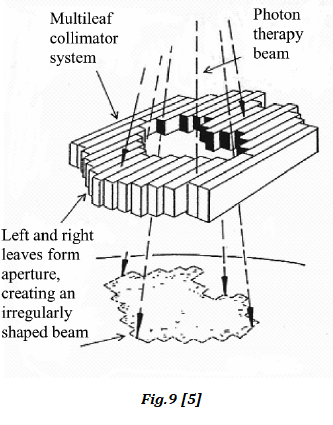

Let's see what will happen with field if we put only one leaf at the middle perpendicular to the $x$ axis as it is shown on figure below.

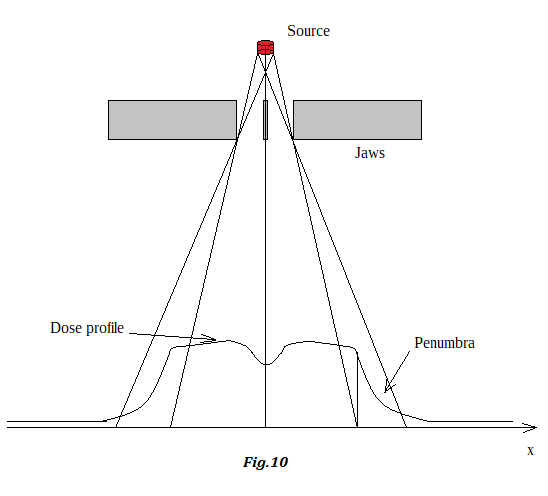

Here we have only to add conditions for falling on the leaf and passing through it. There is 4 options:

1. To fall on the top base of the leaf and to exit from bottom base.
2. To fall on the top base and to exit from the latteral side.
3. To fall on the latteral side and to exit from bottom base.
4. To fall on the latteral side and to exit from the other latteral side.

If gamma ray fall between the jaws ($z = -15$ and $|x| < 1.5$ and $|y| < 1.5$) and if $|x| \leq 0.15$ (because width of the leaf is $3 mm$ and is in the middle of the field) this means that gamma ray fall on the top base of the leaf else he fall between jaws and leaf. After that I calculate $x$ and $y$ coordinates of the gamma ray when reach the plane where lie the bottom base of the jaws. If gamma ray fall on the top base of the leaf and in plane of bottom base of the jaws $|x| \leq 0.15$ this means that gamma ray exit from bottom base else gamma ray exit from latteral side. If gamma ray fall between jaws and leaf and in plane of bottom base of the jaws $|x| > 0.15$ and is with opposite sign this means that gamma ray exit from the other side of the jaws. If $|x| \leq 0.15$ this means that gamma ray exit from bottom base of the leaf. If in plane of top base of the jaws and in plane of bottom base sign of $x$ coordinate is the same this means that gamma ray pass between jaws and leaf without interacting.

Leaf is with width $w = 3mm$ , hight equal to the thickness of the jaws ($l = 15cm$) and is made from tungsten.

If gamma ray fall on the top base of the leaf and exit from bottom base then the distance between points of entering and exiting will be : $$d = \frac{l}{cos(\pi - \theta)}$$ if gamma ray fall on the latteral side and exit from bottom base then this distance will be equal to: $$d = \frac{0.15 - |x_J|}{cos\phi sin(\pi - \theta)}$$ if gamma ray fall on the top base of the leaf and exit from his latteral side then this distance will be: $$d = \frac{0.15 - |x_T|}{cos\phi sin(\pi - \theta)}$$  where $x_T$ is $x$ coordinate in which gamma ray fall on the top base of the leaf $$\\$$ if gamma ray fall on the latteral side and exit from the other latteral side of the leaf then : $$d = \frac{w}{cos\phi sin(\pi - \theta)}$$

Now let's simulate creation of field with leaf in the middle and to plot the field.

In [13]:
def MLC(thickness_of_jaws, top_surface_z, bottom_surface_z, measure_z):
    mu_jaws = 0.98 #absorption coefficient of tungsten
    
    n = np.random.rand()
    exit_point = generating_and_leaving_body(1, 2)
    d = 0
    is_reach_measure_plane = False
    
    # determining where gamma ray will fall
    if exit_point != None:
        xE, yE, zE, theta, phi = exit_point
        
        if theta > np.pi / 2:
            x_top = xE + (top_surface_z - zE) * np.tan(theta) * np.cos(phi)
            y_top = yE + (top_surface_z - zE) * np.tan(theta) * np.sin(phi)
            
            if abs(x_top) >= 1.5 or abs(y_top) >= 1.5:
                d = thickness_of_jaws / np.cos(np.pi - theta)
            else:
                x_bottom = xE + (bottom_surface_z - zE) * np.tan(theta) * np.cos(phi)
                y_bottom = yE + (bottom_surface_z - zE) * np.tan(theta) * np.sin(phi)
                
                if abs(x_bottom) > 1.5 or abs(y_bottom) > 1.5:
                    if abs(x_bottom) > abs(y_bottom):
                        d = (abs(x_bottom) - 1.5) / (np.cos(phi) * np.sin(np.pi - theta))
                    else:
                        d = (abs(y_bottom) - 1.5) / (np.sin(phi) * np.sin(np.pi - theta))
                else:
                    if abs(x_top) <= 0.15:
                        if abs(x_bottom) <= 0.15:
                            d = thickness_of_jaws / np.cos(np.pi - theta)
                        else:
                            d = (0.15 - abs(x_top)) / (np.cos(phi) * np.sin(np.pi - theta))
                    else:
                        if abs(x_bottom) <= 0.15:
                            d = (0.15 - abs(x_bottom)) / (np.cos(phi) * np.sin(np.pi - theta))
                        else:
                            if np.sign(x_top) != np.sign(x_bottom):
                                d = 0.3 / (np.cos(phi) * np.sin(np.pi - theta))
                            else:
                                is_reach_measure_plane = True
                    
            if d < 0:
                d *= -1
                
            p = np.exp(- mu_jaws * d) # probability for passing through the jaws
            
            if n <= p:
                is_reach_measure_plane = True
                
    if is_reach_measure_plane == True:
        return xE, yE, zE, theta, phi, is_reach_measure_plane

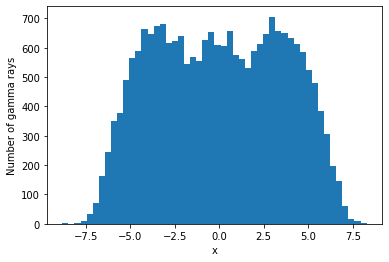

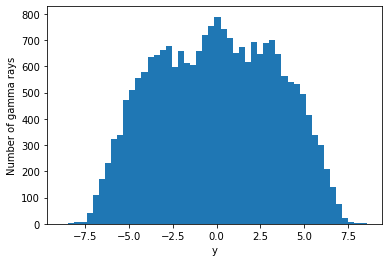

In [14]:
field_simulation_with_flattening_filter(MLC, 10**7, 15, -15, -30, -100)

## III. Conclusion.

From the plots above it is obvious that this leaf in the middle doesn't change the form of the field significantly because of the big penumbra so there is almost none effect from this leaf. We can't modify the shape of the field as successful as we need to protect some tissue or critical organ which is near to the tumor volume which we will irradiate. In linear accelerators penumbra is significantly smaller [2]. This is the reason linear accelerators to raplace teleteraphy machines.

## IV. References.

1. "BARC  DEVELOPS  COBALT-60  TELETHERAPY  MACHINE  FOR  CANCER  TREATMENT" K. Jayarajan, D. C. Kar, R. Sahu, M. G. Radke and Manjit Singh
2. "Handbook of Radiotherapy Physics: Theory and Practice." Mayles P. Nahum A. Rosenwald J. C. Taylor & Francis Group, CRC Press, Boca Raton, FL, 2007.
3. https://physics.nist.gov/PhysRefData/XrayMassCoef/tab3.html
4. Radioactive Cobalt-60 Teletherapy Machine – Estimates of Personnel Dose in Mock Emergency in Patient Release during “Source Stuck Situation”, Ramamoorthy Ravichandran, J Med Phys. 2017 Apr-Jun; 42(2): 96–98.
5. https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FA-multileaf-collimator-MLC-system_fig2_220133319&psig=AOvVaw2PeMZBfvmAM_sTZA0w4X81&ust=1589228942843000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCLjczKmRqukCFQAAAAAdAAAAABAD